# Part 1: Data Preprocessing
## 1. Dataset Selection

• Select a dataset with both numerical and categorical features and a clear
categorical target variable.

- This [dataset](https://www.kaggle.com/datasets/noaa/hurricane-database/data) on hurricanes and typhoons from 1851-2014 contains information related to location, wind, and pressure of tropical cyclones in Atlantic and Pacific Oceans. Due to the older records containing missing values, the neural network will focus on the more recent years of hurricane/typhoons occuring. After dropping rows with missing values, there are 6387 observations and 22 variables dating back to 2004 until 2015.

**Features**

- `ID`: Unique identifier for the record.
- `Name`: Name of the cyclone. (char)
- `Date`: Date of the observation (YYYYMMDD format).
- `Time`: Time of the observation (HHMM format).
- `Event`: Event identifier (categorical)
- `Latitude`: North-South position of the cyclone.
- `Longitude`: East-West position of the cyclone.
- `Maximum Wind`: Maximum sustained wind speed (in mph or km/h) (numeric).
- `Minimum Pressure`: Minimum central pressure (in millibars) (numeric).
- `Low Wind NE`: Low wind speed in the northeast quadrant (numeric).
- `Low Wind SE`: Low wind speed in the southeast quadrant (numeric).
- `Low Wind SW`: Low wind speed in the southwest quadrant (numeric).
- `Low Wind NW`: Low wind speed in the northwest quadrant (numeric).
- `Moderate Wind NE`: Moderate wind speed in the northeast quadrant (numeric).
- `Moderate Wind SE`: Moderate wind speed in the southeast quadrant (numeric).
- `Moderate Wind SW`: Moderate wind speed in the southwest quadrant (numeric).
- `Moderate Wind NW`: Moderate wind speed in the northwest quadrant (numeric).
- `High Wind NE`: High wind speed in the northeast quadrant (numeric).
- `High Wind SE`: High wind speed in the southeast quadrant (numeric).
- `High Wind SW`: High wind speed in the southwest quadrant (numeric).
- `High Wind NW`: High wind speed in the northwest quadrant (numeric).

**Target**
- `Status`: Current status of the tropical cyclone (categorical)

We will be creating a binary variable that indicates whether an event is considered a **Tropical Storm** based off the `Status` variable.

Our research question will test whether information on wind speed and pressure helps predict whether a storm is tropical or not.

**More Information Related to the Status column**
1. TS – Tropical Storm: A storm with wind speeds between 39 to 73 mph (63 to 118 km/h). It is a mature, organized system of thunderstorms with a defined circulation.

2. LO – Low Pressure: This could refer to a general low-pressure system, which could be the precursor to a tropical depression or storm. It's a system of low atmospheric pressure that can develop into a storm or cyclone.

3. HU – Hurricane: A stronger storm, with sustained winds of 74 mph (119 km/h) or greater. It is a more intense version of a tropical storm.

4. TD – Tropical Depression: A tropical system with maximum sustained winds of 38 mph (61 km/h) or less. It is a weaker system compared to a tropical storm and is often in the early stages of storm development.

5. DB – Debris: This may refer to the presence of debris after a storm, indicating that the storm caused damage or disruption.

6. EX – Ex-Tropical Storm: A storm that has weakened and lost its tropical characteristics, no longer maintaining tropical storm strength.

7. PT – Post-Tropical: Refers to a storm that has transitioned from its tropical storm or hurricane phase and is no longer a tropical system. It can still be a significant weather system but is no longer classified as a tropical storm or hurricane.

8. ST – Storm: A generic term that could refer to a variety of storm systems, including tropical storms, hurricanes, or even non-tropical systems.

9. SS – Subtropical Storm: A storm that has characteristics of both tropical and extratropical storms. These storms have a warm core like a tropical storm, but their structure is more like an extratropical cyclone.

10. SD – Subtropical Depression: A weaker form of a subtropical storm, with the same mixed characteristics but weaker winds and less defined structure.


In [62]:
import kagglehub
import pandas as pd
# Download latest version

path = kagglehub.dataset_download("noaa/hurricane-database")
data = pd.read_csv(f"{path}/pacific.csv")

In [63]:
import numpy as np

# Replace -999 with NaN in the DataFrame
data.replace([-999], np.nan, inplace=True)

# Check how many missing values are present
print(data.isnull().sum())

ID                      0
Name                    0
Date                    0
Time                    0
Event                   0
Status                  0
Latitude                0
Longitude               0
Maximum Wind            0
Minimum Pressure    12804
Low Wind NE         19750
Low Wind SE         19750
Low Wind SW         19750
Low Wind NW         19750
Moderate Wind NE    19750
Moderate Wind SE    19750
Moderate Wind SW    19750
Moderate Wind NW    19750
High Wind NE        19750
High Wind SE        19750
High Wind SW        19750
High Wind NW        19750
dtype: int64


In [64]:
data = data.dropna()
data.shape

(6387, 22)

In [65]:
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
19744,EP012004,AGATHA,20040522,0,,TD,14.7N,107.6W,25,1006.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19745,EP012004,AGATHA,20040522,600,,TD,15.4N,108.5W,30,1006.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19746,EP012004,AGATHA,20040522,1200,,TS,16.0N,109.1W,35,1005.0,...,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19747,EP012004,AGATHA,20040522,1800,,TS,16.6N,109.6W,45,1000.0,...,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19748,EP012004,AGATHA,20040523,0,,TS,17.1N,109.9W,50,997.0,...,75.0,75.0,25.0,25.0,25.0,25.0,0.0,0.0,0.0,0.0


In [66]:
data.tail()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
26132,EP222015,SANDRA,20151128,1200,,LO,21.7N,109.0W,35,1002.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26133,EP222015,SANDRA,20151128,1800,,LO,22.4N,108.7W,30,1007.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26134,EP222015,SANDRA,20151129,0,,LO,23.1N,108.3W,30,1008.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26135,EP222015,SANDRA,20151129,600,,LO,23.5N,107.9W,25,1009.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26136,EP222015,SANDRA,20151129,1200,,LO,24.2N,107.7W,20,1010.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
data.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')

In [68]:
data.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,6.387000e+03,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000
mean,2.010066e+07,902.447941,44.285267,996.874432,40.158134,35.054016,26.956318,35.019571,13.395961,11.389541,8.905589,11.356662,5.294348,4.464537,3.401440,4.516205
std,3.566093e+04,672.891069,26.115910,17.380081,48.665145,43.947849,36.051345,46.778330,23.349164,20.669172,17.480695,20.787312,12.090759,10.597693,8.916643,10.831071
min,2.004052e+07,0.000000,15.000000,872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.007071e+07,50.000000,25.000000,994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.010063e+07,1200.000000,35.000000,1004.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.013102e+07,1800.000000,55.000000,1007.000000,70.000000,60.000000,50.000000,60.000000,25.000000,20.000000,10.000000,20.000000,0.000000,0.000000,0.000000,0.000000
max,2.015113e+07,2300.000000,185.000000,1021.000000,300.000000,270.000000,180.000000,1180.000000,150.000000,150.000000,105.000000,150.000000,100.000000,75.000000,75.000000,100.000000


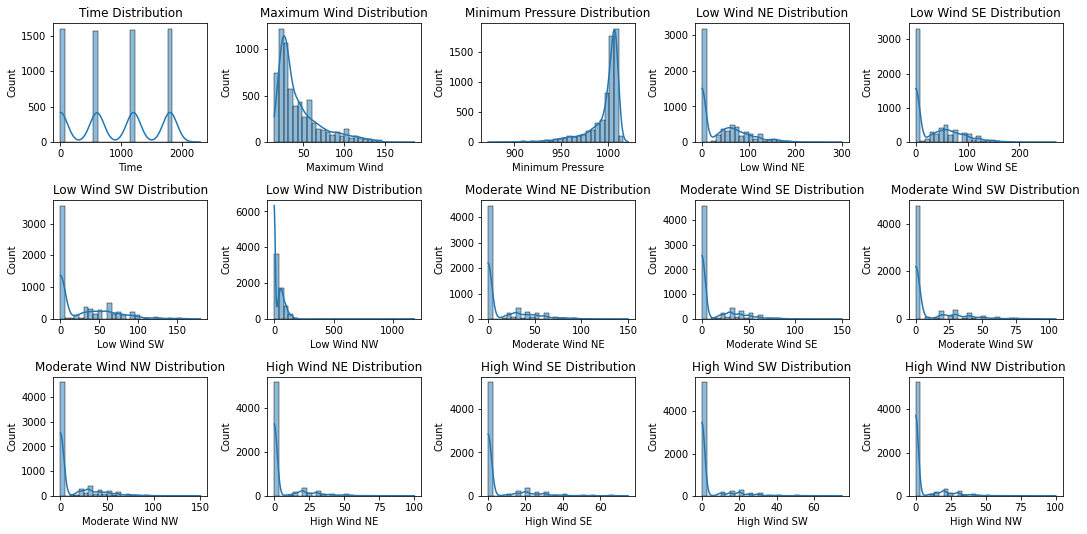

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('Date')

# Set the size of the figure for better visibility
plt.figure(figsize=(15, 12))

# Loop through each numeric column and plot the distribution
for i, column in enumerate(numeric_columns):
    plt.subplot(5, 5, i+1)  # Adjust grid size to fit numeric columns
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'{column} Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Event
     6336
L      41
I       4
S       3
T       3
Name: count, dtype: int64


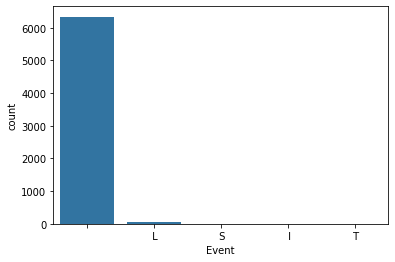

In [71]:
sns.countplot(x='Event', data=data)
print(data.Event.value_counts())

Status
TS     2061
LO     1699
HU     1245
TD     1117
DB      217
EX       24
SS        7
PT        6
ST        6
SD        4
HU        1
Name: count, dtype: int64


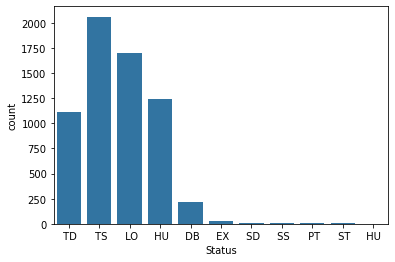

In [72]:
import seaborn as sns

sns.countplot(x='Status', data=data)
print(data.Status.value_counts())

**Tropical Storm (TS)** is the most occuring Status. Let's create a new binary variable that indicates whether the Status is TS or not.

In [73]:
tropical_statuses = ['TS',]
data['Tropical_BinaryStatus'] = data['Status'].str.strip().apply(lambda x: 1 if x in tropical_statuses else 0)


In [74]:
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Tropical_BinaryStatus
19744,EP012004,AGATHA,20040522,0,,TD,14.7N,107.6W,25,1006.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19745,EP012004,AGATHA,20040522,600,,TD,15.4N,108.5W,30,1006.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19746,EP012004,AGATHA,20040522,1200,,TS,16.0N,109.1W,35,1005.0,...,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19747,EP012004,AGATHA,20040522,1800,,TS,16.6N,109.6W,45,1000.0,...,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19748,EP012004,AGATHA,20040523,0,,TS,17.1N,109.9W,50,997.0,...,75.0,25.0,25.0,25.0,25.0,0.0,0.0,0.0,0.0,1


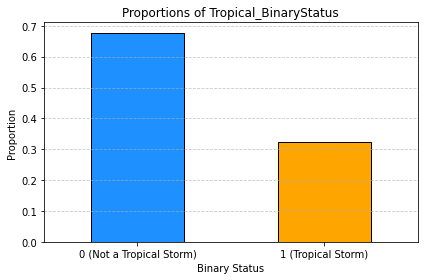

Tropical_BinaryStatus
0    0.677313
1    0.322687
Name: proportion, dtype: float64

In [75]:
# Calculate proportions of each unique value in BinaryStatus
proportions = data['Tropical_BinaryStatus'].value_counts(normalize=True)
# Plotting the proportions
plt.figure(figsize=(6, 4))
proportions.plot(kind='bar', color=['dodgerblue', 'orange'], edgecolor='black')
plt.title('Proportions of Tropical_BinaryStatus')
plt.xlabel('Binary Status')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['0 (Not a Tropical Storm)', '1 (Tropical Storm)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
proportions

The data is unbalanced, as most of the statuses are not Tropical Storm. We will have to incorporate stratified random sampling.

## 2. Data Cleaning

In [76]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

ID                       0
Name                     0
Date                     0
Time                     0
Event                    0
Status                   0
Latitude                 0
Longitude                0
Maximum Wind             0
Minimum Pressure         0
Low Wind NE              0
Low Wind SE              0
Low Wind SW              0
Low Wind NW              0
Moderate Wind NE         0
Moderate Wind SE         0
Moderate Wind SW         0
Moderate Wind NW         0
High Wind NE             0
High Wind SE             0
High Wind SW             0
High Wind NW             0
Tropical_BinaryStatus    0
dtype: int64


The data contains no missing values.

In [77]:
# Check for duplicates
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


The data contains no duplicated values.

In [78]:
# dropping unique identifiers
data = data.drop(columns=['ID', 'Name', 'Date', 'Time', 'Latitude', 'Longitude', 'Status'])

In [79]:
from sklearn.preprocessing import MinMaxScaler

# normalizing numeric features

numeric_features = ['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 
                    'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
                    'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW',
                    'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 
                    'High Wind SW', 'High Wind NW']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to the numeric features
data[numeric_features] = scaler.fit_transform(data[numeric_features])


In [80]:
data.describe()

,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Tropical_BinaryStatus
count,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000,6387.000000
mean,0.172266,0.838083,0.133860,0.129830,0.149757,0.029678,0.089306,0.075930,0.084815,0.075711,0.052943,0.059527,0.045353,0.045162,0.322687
std,0.153623,0.116645,0.162217,0.162770,0.200285,0.039643,0.155661,0.137794,0.166483,0.138582,0.120908,0.141303,0.118889,0.108311,0.467541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.818792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.117647,0.885906,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.235294,0.906040,0.233333,0.222222,0.277778,0.050847,0.166667,0.133333,0.095238,0.133333,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
# One-hot encode categorical input variables
data['Event'] = data['Event'].astype('object')

data = pd.get_dummies(data)
print(data.columns)
data.head()

Index(['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE',
       'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW', 'Tropical_BinaryStatus', 'Event_  ',
       'Event_ I', 'Event_ L', 'Event_ S', 'Event_ T'],
      dtype='object')


,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Tropical_BinaryStatus,Event_,Event_ I,Event_ L,Event_ S,Event_ T
19744,0.058824,0.899329,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,True,False,False,False,False
19745,0.088235,0.899329,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,True,False,False,False,False
19746,0.117647,0.892617,0.25,0.277778,0.416667,0.063559,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1,True,False,False,False,False
19747,0.176471,0.859060,0.25,0.277778,0.416667,0.063559,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1,True,False,False,False,False
19748,0.205882,0.838926,0.25,0.277778,0.416667,0.063559,0.166667,0.166667,0.238095,0.166667,0.0,0.0,0.0,0.0,1,True,False,False,False,False


## 3. Data Splitting


In [82]:
# Define the target variable y
y = data['Tropical_BinaryStatus']

# Define the features X by dropping the target column
X = data.drop(columns=['Tropical_BinaryStatus'])

# Display shapes to confirm the split
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (6387, 19)
Shape of y: (6387,)


In [83]:
X.head()

,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Event_,Event_ I,Event_ L,Event_ S,Event_ T
19744,0.058824,0.899329,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,True,False,False,False,False
19745,0.088235,0.899329,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,True,False,False,False,False
19746,0.117647,0.892617,0.25,0.277778,0.416667,0.063559,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,True,False,False,False,False
19747,0.176471,0.859060,0.25,0.277778,0.416667,0.063559,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,True,False,False,False,False
19748,0.205882,0.838926,0.25,0.277778,0.416667,0.063559,0.166667,0.166667,0.238095,0.166667,0.0,0.0,0.0,0.0,True,False,False,False,False


In [84]:
y.head()

19744    0
19745    0
19746    1
19747    1
19748    1
Name: Tropical_BinaryStatus, dtype: int64

In [85]:
# Let's do a 70-15-15 split to deal with the unbalanced data.T

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
# Splits the data into 70% training, 30% temporary data 

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state = 42, stratify = y_temp)
# Splits the temporary data in half, 50% validation, 50% testing

print("Training set Shape: ", X_train.shape)
print("Validation set Shape: ", X_val.shape)
print("Test set Shape: ", X_test.shape)

Training set Shape:  (4470, 19)
Validation set Shape:  (958, 19)
Test set Shape:  (959, 19)


# Part 2: Model Design and Implementation
## 4. Model Architecture

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)

N, D = X_train.shape

model = Sequential([
    Dense(64, activation = 'relu', input_shape=(D,)),
    Dense(64, activation = 'relu'),
    Dropout(rate = 0.01), 

    Dense(1, activation = 'sigmoid')  # Output layer for binary classification
])


# Compile the model
model.compile(optimizer=Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Our base model is a feedforward neural network with one input layer and one hidden layer, each consisting of 64 neurons and ReLU activation. It includes a dropout layer with a 1% rate for regularization to prevent overfitting. The output layer has one neuron with a Sigmoid activation for binary classification, and the model is compiled with the Adam optimizer and binary crossentropy loss function.

In [87]:
r = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 10)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8699 - loss: 0.2865 - val_accuracy: 0.9812 - val_loss: 0.0712
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9901 - loss: 0.0450 - val_accuracy: 0.9760 - val_loss: 0.0927
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9869 - loss: 0.0561 - val_accuracy: 0.9854 - val_loss: 0.0549
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9914 - loss: 0.0382 - val_accuracy: 0.9823 - val_loss: 0.0634
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9883 - loss: 0.0480 - val_accuracy: 0.9833 - val_loss: 0.0592
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9907 - loss: 0.0372 - val_accuracy: 0.9875 - val_loss: 0.0546
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9845 - loss: 0.0620 - val_accuracy: 0.9854 - val_loss: 0.0646
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9856 - loss: 0.0555 - val_accuracy: 0.

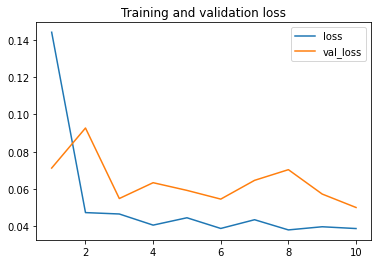

In [88]:
loss = r.history['loss']
val_loss = r.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label = 'loss')
plt.plot(epochs, val_loss, label = 'val_loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

We need to optimize our hyperparameters.

## 5. Hyperparameter Tuning

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
import numpy as np

# Step 1: Define a function to create your model
def create_model(learning_rate=0.01, neurons=32, dropout_rate=0.2):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Wrap the Keras model for scikit-learn compatibility
keras_model = KerasClassifier(model=create_model, verbose=0)

# Step 3: Define the hyperparameter grid
param_distributions = {
    "model__learning_rate": [0.001, 0.01, 0.1],
    "model__neurons": [16, 32, 64, 128],
    "model__dropout_rate": [0.1, 0.2, 0.3],
    "batch_size": [16, 32, 64],
    "epochs": [10, 20, 30],
}

# Step 4: Perform Random Search
random_search = RandomizedSearchCV(
    estimator=keras_model,
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=3,       # Number of cross-validation folds
    scoring="accuracy",  # Metric to optimize
    verbose=2
)

# Step 5: Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Step 6: Retrieve the best parameters
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__dropout_rate=0.2, model__learning_rate=0.1, model__neurons=32; total time=   4.3s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__dropout_rate=0.2, model__learning_rate=0.1, model__neurons=32; total time=   4.0s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__dropout_rate=0.2, model__learning_rate=0.1, model__neurons=32; total time=   4.1s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__dropout_rate=0.3, model__learning_rate=0.01, model__neurons=16; total time=   8.7s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__dropout_rate=0.3, model__learning_rate=0.01, model__neurons=16; total time=   8.8s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__dropout_rate=0.3, model__learning_rate=0.01, model__neurons=16; total time=   8.9s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__dropout_rate=0.1, model__learning_rate=0.01, model__neurons=64; total time=   3.8s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__dropout_rate=0.1, model__learning_rate=0.01, model__neurons=64; total time=   3.8s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__dropout_rate=0.1, model__learning_rate=0.01, model__neurons=64; total time=   3.7s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=16; total time=   1.8s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=16; total time=   1.8s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=16; total time=   2.3s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.01, model__neurons=64; total time=   3.9s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.01, model__neurons=64; total time=   3.5s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.01, model__neurons=64; total time=   3.8s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=20, model__dropout_rate=0.1, model__learning_rate=0.01, model__neurons=16; total time=   2.7s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=20, model__dropout_rate=0.1, model__learning_rate=0.01, model__neurons=16; total time=   2.7s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=20, model__dropout_rate=0.1, model__learning_rate=0.01, model__neurons=16; total time=   2.8s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=30, model__dropout_rate=0.2, model__learning_rate=0.1, model__neurons=32; total time=   5.4s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=30, model__dropout_rate=0.2, model__learning_rate=0.1, model__neurons=32; total time=   5.4s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=30, model__dropout_rate=0.2, model__learning_rate=0.1, model__neurons=32; total time=   5.8s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=16; total time=   3.6s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=16; total time=   3.6s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=16; total time=   3.5s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__dropout_rate=0.2, model__learning_rate=0.1, model__neurons=64; total time=   4.3s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__dropout_rate=0.2, model__learning_rate=0.1, model__neurons=64; total time=   4.4s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__dropout_rate=0.2, model__learning_rate=0.1, model__neurons=64; total time=   4.6s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.1, model__neurons=64; total time=   2.6s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.1, model__neurons=64; total time=   2.4s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.1, model__neurons=64; total time=   2.5s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=20, model__dropout_rate=0.1, model__learning_rate=0.01, model__neurons=32; total time=   6.3s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=20, model__dropout_rate=0.1, model__learning_rate=0.01, model__neurons=32; total time=   6.6s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=20, model__dropout_rate=0.1, model__learning_rate=0.01, model__neurons=32; total time=   7.2s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=10, model__dropout_rate=0.1, model__learning_rate=0.1, model__neurons=64; total time=   2.8s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=10, model__dropout_rate=0.1, model__learning_rate=0.1, model__neurons=64; total time=   2.8s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=10, model__dropout_rate=0.1, model__learning_rate=0.1, model__neurons=64; total time=   3.0s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.01, model__neurons=32; total time=   1.9s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.01, model__neurons=32; total time=   2.0s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.3, model__learning_rate=0.01, model__neurons=32; total time=   2.4s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__dropout_rate=0.1, model__learning_rate=0.001, model__neurons=16; total time=  11.6s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__dropout_rate=0.1, model__learning_rate=0.001, model__neurons=16; total time=   9.6s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__dropout_rate=0.1, model__learning_rate=0.001, model__neurons=16; total time=   9.9s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__dropout_rate=0.3, model__learning_rate=0.1, model__neurons=64; total time=   4.8s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__dropout_rate=0.3, model__learning_rate=0.1, model__neurons=64; total time=   4.5s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__dropout_rate=0.3, model__learning_rate=0.1, model__neurons=64; total time=   4.5s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__dropout_rate=0.2, model__learning_rate=0.1, model__neurons=128; total time=  10.9s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__dropout_rate=0.2, model__learning_rate=0.1, model__neurons=128; total time=  11.0s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__dropout_rate=0.2, model__learning_rate=0.1, model__neurons=128; total time=  11.2s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__dropout_rate=0.3, model__learning_rate=0.01, model__neurons=128; total time=   4.4s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__dropout_rate=0.3, model__learning_rate=0.01, model__neurons=128; total time=   4.5s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__dropout_rate=0.3, model__learning_rate=0.01, model__neurons=128; total time=   4.5s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.1, model__learning_rate=0.1, model__neurons=64; total time=   1.9s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.1, model__learning_rate=0.1, model__neurons=64; total time=   2.0s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=10, model__dropout_rate=0.1, model__learning_rate=0.1, model__neurons=64; total time=   1.9s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=20, model__dropout_rate=0.2, model__learning_rate=0.01, model__neurons=16; total time=   7.4s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=20, model__dropout_rate=0.2, model__learning_rate=0.01, model__neurons=16; total time=   7.0s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=20, model__dropout_rate=0.2, model__learning_rate=0.01, model__neurons=16; total time=   7.1s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.01, model__neurons=16; total time=   2.7s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.01, model__neurons=16; total time=   2.7s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=10, model__dropout_rate=0.2, model__learning_rate=0.01, model__neurons=16; total time=   2.9s


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best parameters: {'model__neurons': 16, 'model__learning_rate': 0.01, 'model__dropout_rate': 0.3, 'epochs': 30, 'batch_size': 16}
Best score: 0.9917225950782997


In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import numpy as np

neurons = 16
learning_rate = 0.001
dropout_rate = 0.3
epochs = 30
batch_size = 16
l2_regularization = 0.01  # L2 regularization strength

X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)

N, D = X_train.shape

model = Sequential([
    Dense(neurons, activation='relu', input_shape=(D,), 
          kernel_regularizer=regularizers.l2(l2_regularization)),
    Dropout(dropout_rate),
    Dense(neurons, activation='relu',
          kernel_regularizer=regularizers.l2(l2_regularization)),
    Dropout(dropout_rate),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\ntlmp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 6. Training and Validation

In [113]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
)


Epoch 1/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6586 - loss: 0.8590 - val_accuracy: 0.6795 - val_loss: 0.6373
Epoch 2/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7181 - loss: 0.6040 - val_accuracy: 0.8904 - val_loss: 0.4666
Epoch 3/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8650 - loss: 0.4707 - val_accuracy: 0.9353 - val_loss: 0.3851
Epoch 4/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9105 - loss: 0.4114 - val_accuracy: 0.9405 - val_loss: 0.3424
Epoch 5/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9181 - loss: 0.3832 - val_accuracy: 0.9468 - val_loss: 0.3223
Epoch 6/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9243 - loss: 0.3608 - val_accuracy: 0.9457 - val_loss: 0.3055
Epoch 7/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9267 - loss: 0.3458 - val_accuracy: 0.9603 - val_loss: 0.3009
Epoch 8/30
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9309 - loss: 0.3420 - val_accuracy: 0.

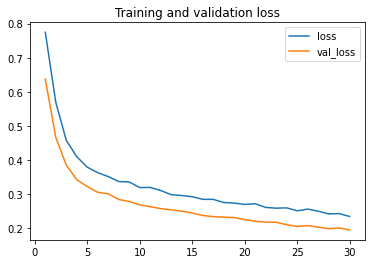

In [114]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label = 'loss')
plt.plot(epochs, val_loss, label = 'val_loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

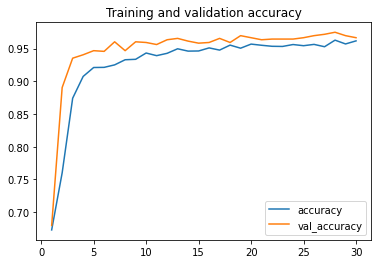

In [115]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label = 'accuracy')
plt.plot(epochs, val_accuracy, label = 'val_accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

# Part 3: Evaluation and Interpretation

## 7. Test Set Evaluation

In [118]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss {:.4f}".format(test_loss))
print("Test accuracy {:.4f}".format(test_accuracy))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9712 - loss: 0.1755 
Test loss 0.1838
Test accuracy 0.9718


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


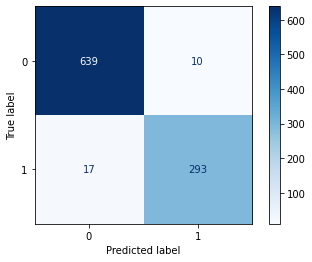

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels (0 or 1) using a threshold of 0.5
y_pred = (y_pred_probs > 0.5).astype(int)

# Convert y_test to a NumPy array and flatten it
y_test_flatten = y_test.to_numpy().flatten()

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_flatten, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()


## 8. Model Interpretation

The confusion matrix indicates that the model has an accuracy of approximately 97.18%, meaning it correctly predicted the label in 97.18% of cases, both for positive and negative labels. The model has a precision value $ \frac{TP}{TP + FP} = \frac{293}{293 + 10}$ of about 96.69% for the positive class (label 1). This means that when the model predicted the positive class, it was correct 96.69% of the time, showing that it is quite reliable in predicting positive outcomes without many false positives.

The model utilizes a binary classification neural network with one input layer and one hidden layer, each containing 16 neurons, ReLU activations, and L2 regularization to prevent overfitting. It also includes dropout with a rate of 0.3 to assist with generalization. The Adam optimizer with a learning rate of 0.001 minimizes the binary cross-entropy loss function used for binary classification problems. The regularization and dropout also limits the complexity of the model and ensures that it will not rely too heavily on specific features. The performance of the model is largely influenced by the input features, with important characteristics such as wind speed and pressure potentially contributing most to the model’s predictions.

## 9. Conclusion

The data related to wind speed and pressure was shown to be valuable in predicting whether a storm was tropical or not, as these variables are directly linked to the strength and development of tropical storms. The model demonstrated that these features were vital for making accurate classifications. Looking ahead, I aim to enhance the model by incorporating additional factors such as changes in water temperature due to global warming and geographic data, which could provide a deeper understanding of storm behavior. By integrating these variables, I hope to improve the model's accuracy and make more informative decisions related to typhoon and hurricane occurences.